<a href="https://colab.research.google.com/github/sasumwen/FashionMNIST/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Label: 9

 Image Pixel Array:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.01176471 0.01176471 0.00784314 0.00392157 0.         0.         0.         0.         0.         0.0627451  0.43137255 0.59215686 0.75686275 0.32156863 0.        ]
 [0.         0.         0.         0

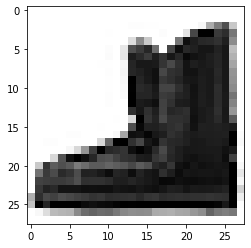

In [18]:
# Select index
index= 84

# Set Number of characters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image
print(f'Label: {train_labels[index]}')
print(f'\n Image Pixel Array:\n {train_images[index]}')

# visualize the image
plt.imshow(train_images[index], cmap="Greys")

In [23]:
tf.random.set_seed(84)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation= "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [24]:
tf.random.set_seed(84)
cb= tf.keras.callbacks.EarlyStopping(monitor = "accuracy", patience = 3)

In [25]:
tf.random.set_seed(84)
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["accuracy"])

In [26]:
model.fit(tf.expand_dims(train_images, -1), train_labels, epochs = 500, callbacks = [cb])

Epoch 1/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4986 - accuracy: 0.8235
Epoch 2/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8654
Epoch 3/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8763
Epoch 4/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3146 - accuracy: 0.8846
Epoch 5/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8913
Epoch 6/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.8955
Epoch 7/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9000
Epoch 8/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2585 - accuracy: 0.9023
Epoch 9/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2481 - accuracy: 0.9068
Epoch 10/500
1875/1875 [==============================] - 5s 3ms/step - l

In [27]:
# evaluate on test
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6255 - accuracy: 0.8872


[0.6255062222480774, 0.8871999979019165]

In [32]:
clf = tf.squeeze(model.predict(test_images))

313/313 [==============================] - 1s 3ms/step


In [33]:
print(clf[0])

tf.Tensor([9.6435003e-24 4.9729081e-28 3.1732106e-21 2.2414528e-24 7.9926545e-35 7.0507158e-14 4.3130339e-33 4.4754986e-10 2.7430818e-24 9.9999994e-01], shape=(10,), dtype=float32)


In [31]:
print(test_labels[0])

9
